# Importing libraries

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# DATA Preprocessing

Training Image Preprocessing

In [20]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1120 files belonging to 2 classes.


In [21]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

Validation Image Preprocessing

In [22]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 4200 files belonging to 2 classes.


In [23]:
validation_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

In [24]:
for x,y in training_set:
    print(x)
    print(y)
    break

tf.Tensor(
[[[[ 23.5   23.5   23.5 ]
   [  5.25   5.25   5.25]
   [  1.75   1.75   1.75]
   ...
   [  7.5    7.5    7.5 ]
   [ 12.    12.    12.  ]
   [ 40.75  40.75  40.75]]

  [[ 41.25  41.25  41.25]
   [ 21.    21.    21.  ]
   [ 21.75  21.75  21.75]
   ...
   [  5.25   5.25   5.25]
   [  9.     9.     9.  ]
   [ 24.5   24.5   24.5 ]]

  [[ 68.25  68.25  68.25]
   [ 49.5   49.5   49.5 ]
   [ 45.25  45.25  45.25]
   ...
   [ 62.    62.    62.  ]
   [ 31.    31.    31.  ]
   [ 47.    47.    47.  ]]

  ...

  [[  3.75   3.75   3.75]
   [  3.     3.     3.  ]
   [  3.     3.     3.  ]
   ...
   [  3.     3.     3.  ]
   [  3.     3.     3.  ]
   [  3.     3.     3.  ]]

  [[  4.     4.     4.  ]
   [  4.     4.     4.  ]
   [  4.     4.     4.  ]
   ...
   [  3.     3.     3.  ]
   [  3.     3.     3.  ]
   [  3.     3.     3.  ]]

  [[  4.     4.     4.  ]
   [  4.     4.     4.  ]
   [  4.     4.     4.  ]
   ...
   [  3.     3.     3.  ]
   [  3.     3.     3.  ]
   [  4.5    4.5    

# Building Model

In [25]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential

In [26]:
modal = tf.keras.models.Sequential()

In [27]:
modal.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
modal.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
modal.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [28]:
modal.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
modal.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
modal.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [29]:
modal.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
modal.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
modal.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [30]:
modal.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
modal.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
modal.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [31]:
modal.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
modal.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
modal.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [32]:
modal.add(tf.keras.layers.Dropout(0.25))

In [33]:
modal.add(tf.keras.layers.Flatten())

In [34]:
modal.add(tf.keras.layers.Dense(units=1024,activation='relu'))

In [35]:
modal.add(tf.keras.layers.Dropout(0.4)) 

In [36]:
#Output Layer
modal.add(tf.keras.layers.Dense(units=2,activation='softmax'))

Compiling Model

In [37]:
#Adam optimizer
modal.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [38]:
modal.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         2,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,812,450 (25.99 MB)

 Trainable params: 6,812,450 (25.99 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
training_history = modal.fit(x=training_set,validation_data=validation_set,epochs=10)
#training_history = modal.fit(training_set)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.5721 - loss: 1.2183 - val_accuracy: 0.9133 - val_loss: 0.3327
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8123 - loss: 0.3656 - val_accuracy: 0.9407 - val_loss: 0.2156
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.8934 - loss: 0.2384 - val_accuracy: 0.9436 - val_loss: 0.1372
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9151 - loss: 0.2080 - val_accuracy: 0.9317 - val_loss: 0.1896
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.9319 - loss: 0.1677 - val_accuracy: 0.9545 - val_loss: 0.1017
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.9396 - loss: 0.1354 - val_accuracy: 0.8721 - val_loss: 0.3071
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 95s 3s/step - accuracy: 0.9453 - loss: 0.1173 - val_accuracy: 0.9517 - val_loss: 0.1375
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 103s 3s/step - accuracy: 0.9643 - loss: 0.0800 - val_accuracy: 0.9767 - val_loss

## Evaluating Model

In [40]:
#Training set Accuracy
train_loss, train_acc = modal.evaluate(training_set)

35/35 ━━━━━━━━━━━━━━━━━━━━ 15s 405ms/step - accuracy: 0.9813 - loss: 0.0505


In [41]:
print(train_loss, train_acc)

0.048098254948854446 0.9794642925262451


In [42]:
#Validation set Accuracy
val_loss, val_acc = modal.evaluate(validation_set)

132/132 ━━━━━━━━━━━━━━━━━━━━ 55s 413ms/step - accuracy: 0.9329 - loss: 0.2093


In [43]:
print(val_loss, val_acc)

0.2136087715625763 0.9314285516738892


# Saving Model

In [44]:
modal.save('Tuberculosis_detection_model.keras')

In [45]:
training_history.history #Return Dictionary of history

{'accuracy': [0.6616071462631226,
  0.8294642567634583,
  0.9008928537368774,
  0.9160714149475098,
  0.9437500238418579,
  0.9491071701049805,
  0.9598214030265808,
  0.9732142686843872,
  0.9785714149475098,
  0.9785714149475098],
 'loss': [0.7705081105232239,
  0.3413524925708771,
  0.22993344068527222,
  0.20158879458904266,
  0.1471407562494278,
  0.12967799603939056,
  0.09705587476491928,
  0.0638650581240654,
  0.05713996663689613,
  0.04996776953339577],
 'val_accuracy': [0.9133333563804626,
  0.9407142996788025,
  0.9435714483261108,
  0.9316666722297668,
  0.9545238018035889,
  0.8721428513526917,
  0.9516666531562805,
  0.9766666889190674,
  0.9685714244842529,
  0.9314285516738892],
 'val_loss': [0.33270254731178284,
  0.21560491621494293,
  0.13716813921928406,
  0.18961985409259796,
  0.10171632468700409,
  0.3071272075176239,
  0.13746728003025055,
  0.06949762254953384,
  0.1148994192481041,
  0.21643681824207306]}

In [46]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [47]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


# Accuracy Visualization

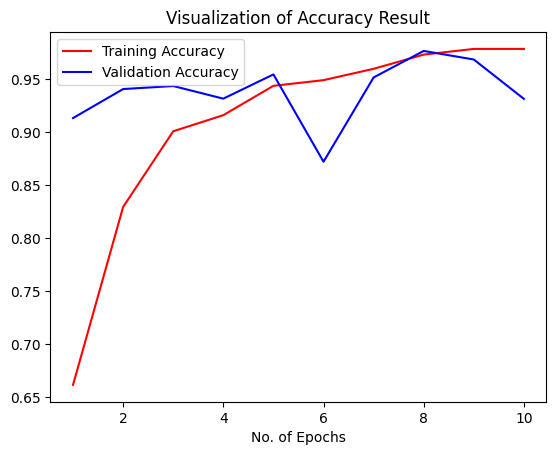

In [48]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Model Testing

Loading Model

In [49]:
myModal = tf.keras.models.load_model('Tuberculosis_detection_model.keras')

In [50]:
myModal.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         2,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,437,352 (77.96 MB)

 Trainable params: 6,812,450 (25.99 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,624,902 (51.97 MB)

In [51]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


Visualising and Performing Prediction on Single image

In [54]:
#Test Image Visualization
import cv2

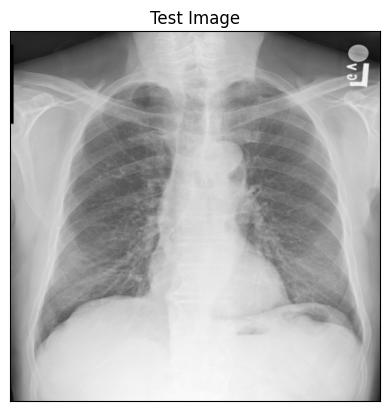

In [55]:
image_path = 'Patients_x_ray_image/Patient-19.png'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()    

In [56]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = myModal.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


In [57]:
print(predictions)

[[0.9834601  0.01653992]]


In [58]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

0


In [59]:
class_name = validation_set.class_names

In [60]:
print(class_name)

['Normal', 'Tuberculosis']


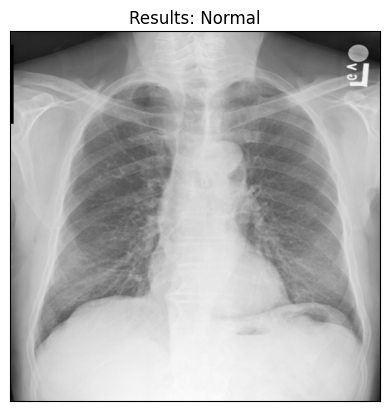

In [61]:
# Displaying the TB prediction
myModel_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Results: {myModel_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()